In [75]:
import deltaRCM_base
reload(deltaRCM_base)
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

class deltaRCM(deltaRCM_base.Tools):

    _input_vars = {
        'model_output__site_prefix': {'name':'site_prefix', 'type': 'string', 'default': ''},
        'model_output__case_prefix': {'name':'case_prefix', 'type': 'string', 'default': ''},
        'model_output__out_dir': {'name':'out_dir', 'type': 'string', 'default': 'deltaRCM_Output/'},
        'model__total_timesteps': {'name':'n_steps', 'type': 'long', 'default': 200},
        'model_grid__length': {'name':'Length', 'type': 'float', 'default': 200.},
        'model_grid__width': {'name':'Width', 'type': 'float', 'default': 500.},
        'model_grid__cell_size': {'name':'dx', 'type': 'float', 'default': 10.},
        'land_surface__width': {'name':'L0_meters', 'type': 'float', 'default': 30.}, 
        'land_surface__slope': {'name':'S0', 'type': 'float', 'default': 0.00015},
        'model__max_iteration': {'name':'itermax', 'type': 'long', 'default': 3},
        'water__number_parcels': {'name':'Np_water', 'type': 'long', 'default': 200},
        'channel__flow_velocity': {'name':'u0', 'type': 'float', 'default': 1.},
        'channel__width': {'name':'N0_meters', 'type': 'float', 'default': 50.},
        'channel__flow_depth': {'name':'h0', 'type': 'float', 'default': 5.},
        'sea_water_surface__elevation': {'name':'H_SL', 'type': 'float', 'default': 0.},
        'sea_water_surface__rate_change_elevation': {'name':'SLR', 'type': 'float', 'default': 0.},
        'sediment__number_parcels': {'name':'Np_sed', 'type': 'long', 'default': 500},
        'sediment__bedload_fraction': {'name':'f_bedload', 'type': 'float', 'default': 0.25}, 
        'sediment__influx_concentration': {'name':'C0_percent', 'type': 'float', 'default': 0.1},                   
        'model_output__opt_eta_figs': {'name':'save_eta_figs', 'type': 'choice', 'default': True},
        'model_output__opt_stage_figs': {'name':'save_stage_figs', 'type': 'choice', 'default': False},
        'model_output__opt_depth_figs': {'name':'save_depth_figs', 'type': 'choice', 'default': False},
        'model_output__opt_eta_grids': {'name':'save_eta_grids', 'type': 'choice', 'default': False},
        'model_output__opt_stage_grids': {'name':'save_stage_grids', 'type': 'choice', 'default': False},
        'model_output__opt_depth_grids': {'name':'save_depth_grids', 'type': 'choice', 'default': False},
        'model_output__opt_time_interval': {'name':'save_dt', 'type': 'long', 'default': 10},
        'coeff__surface_smoothing': {'name': 'Csmooth', 'type': 'float', 'default': 0.9},
        'coeff__under_relaxation__water_surface': {'name': 'omega_sfc', 'type': 'float', 'default': 0.1},
        'coeff__under_relaxation__water_flow': {'name': 'omega_flow', 'type': 'float', 'default': 0.9},
        'coeff__iterations_smoothing_algorithm': {'name': 'Nsmooth', 'type': 'long', 'default': 5},
        'coeff__depth_dependence__water': {'name': 'theta_water', 'type': 'float', 'default': 1.0},
        'coeff__depth_dependence__sand': {'name': 'coeff_theta_sand', 'type': 'float', 'default': 2.0},
        'coeff__depth_dependence__mud': {'name': 'coeff_theta_mud', 'type': 'float', 'default': 1.0},
        'coeff__non_linear_exp_sed_flux_flow_velocity': {'name': 'beta', 'type': 'long', 'default': 3},
        'coeff__sedimentation_lag': {'name': 'sed_lag', 'type': 'float', 'default': 1.0},
        'coeff__velocity_deposition_mud': {'name': 'coeff_U_dep_mud', 'type': 'float', 'default': 0.3},
        'coeff__velocity_erosion_mud': {'name': 'coeff_U_ero_mud', 'type': 'float', 'default': 1.5},
        'coeff__velocity_erosion_sand': {'name': 'coeff_U_ero_sand', 'type': 'float', 'default': 1.05},
        'coeff__topographic_diffusion': {'name': 'alpha', 'type': 'float', 'default': 0.1}
        }


    #############################################
    ################### update ##################
    #############################################

    def update(self):
        '''
        Run the model for one full instance
        '''

        for timestep in range(self.n_steps):
            self.run_one_timestep(timestep)
            self.output_data(timestep)



    #############################################
    ################## __init__ #################
    #############################################

    def __init__(self):
        '''
        Creates an instance of the model

        Sets the most commonly changed variables here
        Calls functions to set the rest and create the domain (for cleanliness)
        '''
        
        self.verbose = True
        self.input_file = 'deltaRCM.in'
        
        self.create_dicts()
        self.set_defaults()
        self.import_file()
        
        self.create_other_variables()
        self.create_domain()
        
        self.init_output_grids()




delta = deltaRCM()
delta.update()


Reading input file...
Finished reading 26 variables from input file.
--------------------
Time = 1 of 10
--------------------
Time = 2 of 10
--------------------
Time = 3 of 10
--------------------
Time = 4 of 10
--------------------
Time = 5 of 10
--------------------
Time = 6 of 10
--------------------
Time = 7 of 10
--------------------
Time = 8 of 10
--------------------
Time = 9 of 10
--------------------
Time = 10 of 10


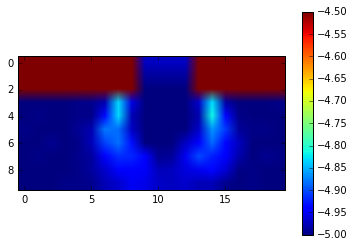

In [19]:
plt.imshow(delta.eta[0:10,40:60], clim = (-5,-4.5))
plt.colorbar()

In [73]:
# create netCDF file
from netCDF4 import Dataset
import os
import time

file_path = 'test.nc'

# check that the output directory exists

# if file exists, delete it
if os.path.exists(file_path):
    os.remove(file_path)
    
dataset = Dataset(file_path, 'w', format='NETCDF4_CLASSIC')

dataset.description = 'Output grids from pyDeltaRCM'
dataset.history = 'Created ' + time.ctime(time.time())
dataset.source = 'pyDeltaRCM / CSDMS'

length = dataset.createDimension('length', delta.L)
width = dataset.createDimension('width', delta.W)
time = dataset.createDimension('time', None)

x = dataset.createVariable('x', np.float32, ('length','width'))
y = dataset.createVariable('y', np.float32, ('length','width'))
time_v = dataset.createVariable('time', np.int32, ('time',))
eta = dataset.createVariable('eta', np.float32, ('time','length','width'))

x.units = 'meters'
y.units = 'meters'
time_v.units = 'timesteps'

x[:] = delta.x
y[:] = delta.y

In [71]:
shape = dataset['eta'].shape
dataset['eta'][shape[0],:,:] = delta.eta

In [72]:
dataset['eta'].shape

(3, 50, 100)

In [70]:
delta.eta.shape

(50, 100)